## Transfer Learning VGG 16 and VGG 19 using Keras

Please download the dataset from the below url

In [1]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train' 
valid_path = 'Datasets/test'


In [3]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [4]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [5]:
  # useful for getting number of output classes
folders = glob('Datasets/train/*')

In [6]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [7]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [8]:

# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [9]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [10]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [11]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [12]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [13]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
2/2 [==============================] - 20s 10s/step - loss: 9.2839 - accuracy: 0.2500 - val_loss: 8.8309 - val_accuracy: 0.1552
Epoch 2/50
2/2 [==============================] - 13s 6s/step - loss: 7.0919 - accuracy: 0.2969 - val_loss: 2.2522 - val_accuracy: 0.6034
Epoch 3/50
2/2 [==============================] - 11s 5s/step - loss: 5.3786 - accuracy: 0.4688 - val_loss: 7.6004 - val_accuracy: 0.3276
Epoch 4/50
2/2 [==============================] - 11s 5s/step - loss: 6.8165 - accuracy: 0.3906 - val_loss: 1.4192 - val_accuracy: 0.6034
Epoch 5/50
2/2 [==============================] - 12s 6s/step - loss: 2.0192 - accuracy: 0.4844 - val_loss: 4.4079 - val_accuracy: 0.1552
Epoch 6/50
2/2 [==============================] - 9s 5s/step - loss: 4.3305 - accuracy: 0.3594 - val_loss: 3.9620 - val_accuracy: 0.3448
Epoch 7/50
2/2 [==============================] - 9s 5s/step - loss: 3.1809 - accuracy: 0.4688 -

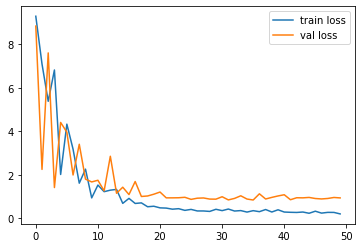

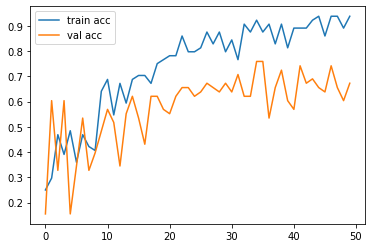

<Figure size 432x288 with 0 Axes>

In [14]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [15]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [16]:

y_pred = model.predict(test_set)


In [17]:
y_pred

array([[1.70228444e-03, 9.72926259e-01, 2.53714696e-02],
       [6.12076605e-03, 9.23292398e-01, 7.05868527e-02],
       [7.57421136e-01, 8.98406878e-02, 1.52738124e-01],
       [2.07494036e-03, 9.22837615e-01, 7.50874355e-02],
       [1.08865956e-02, 5.43076813e-01, 4.46036577e-01],
       [7.17283972e-03, 7.35273182e-01, 2.57554024e-01],
       [9.86448303e-03, 4.42508847e-01, 5.47626674e-01],
       [9.81146544e-02, 4.00632262e-01, 5.01253128e-01],
       [2.10724596e-04, 9.84028637e-01, 1.57606509e-02],
       [6.91287266e-03, 4.58190233e-01, 5.34896851e-01],
       [4.67754295e-03, 8.33191752e-01, 1.62130684e-01],
       [5.38753439e-03, 1.86565204e-03, 9.92746770e-01],
       [4.74219501e-04, 9.33456302e-01, 6.60693944e-02],
       [5.03676245e-03, 9.93055761e-01, 1.90749706e-03],
       [1.70893793e-03, 2.41472181e-02, 9.74143863e-01],
       [6.36962950e-01, 3.41134816e-01, 2.19021607e-02],
       [2.31744833e-02, 9.45549458e-03, 9.67370033e-01],
       [2.91445583e-01, 5.27280

In [18]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [19]:
y_pred

array([1, 1, 0, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 0, 2, 1, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 0, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 0, 1, 2,
       2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2], dtype=int64)

In [20]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [21]:
model=load_model('model_resnet50.h5')

In [23]:
img=image.load_img('Datasets/Test/lamborghini/11.jpg',target_size=(224,224))



In [24]:
x=image.img_to_array(img)
x

array([[[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [194., 188., 174.],
        [215., 209., 197.],
        [241., 235., 223.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [247., 245., 233.],
        [245., 242., 233.],
        [244., 241., 232.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [245., 248., 241.],
        [244., 250., 248.],
        [244., 250., 248.]],

       ...,

       [[190., 206., 229.],
        [190., 206., 229.],
        [190., 206., 229.],
        ...,
        [172., 179., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[187., 205., 227.],
        [187., 205., 227.],
        [187., 205., 227.],
        ...,
        [172., 179., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [187., 2

In [25]:
x.shape

(224, 224, 3)

In [26]:
x=x/255

In [27]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [28]:
model.predict(img_data)

array([[0.0015482, 0.0173427, 0.9811091]], dtype=float32)

In [29]:
a=np.argmax(model.predict(img_data), axis=1)

In [30]:
a

array([2], dtype=int64)